 # TP6. Deep learning with Keras 

### Preparation

For Mac, linux:
- install tensorflow: pip3 install tensorflow
- install keras: pip3 install tensorflow

For windows: Let's see

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Feed-forward networks

Here is an example with dummy data

In [2]:
import numpy as np

x_train = np.random.random((1000, 20))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 20))
y_test = np.random.randint(2, size=(100, 1))

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

model.fit(x_train, y_train,
          epochs=100,
          batch_size=16)
_, acc = model.evaluate(x_test, y_test, batch_size=16)
print('test accuracy: ', acc)

Using TensorFlow backend.
/usr/lib/python3/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1344      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1950      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 3,325
Trainable params: 3,325
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1000/1000 [==============================] - 0s 272us/step - loss: 0.7308 - acc: 0.4940
Epoch 2/100
1000/1000 [============

1000/1000 [==============================] - 0s 58us/step - loss: 0.6261 - acc: 0.6650
Epoch 74/100
1000/1000 [==============================] - 0s 58us/step - loss: 0.6394 - acc: 0.6420
Epoch 75/100
1000/1000 [==============================] - 0s 67us/step - loss: 0.6323 - acc: 0.6410
Epoch 76/100
1000/1000 [==============================] - 0s 72us/step - loss: 0.6359 - acc: 0.6450
Epoch 77/100
1000/1000 [==============================] - 0s 72us/step - loss: 0.6382 - acc: 0.6490
Epoch 78/100
1000/1000 [==============================] - 0s 66us/step - loss: 0.6291 - acc: 0.6540
Epoch 79/100
1000/1000 [==============================] - 0s 57us/step - loss: 0.6336 - acc: 0.6280
Epoch 80/100
1000/1000 [==============================] - 0s 65us/step - loss: 0.6293 - acc: 0.6650
Epoch 81/100
1000/1000 [==============================] - 0s 63us/step - loss: 0.6176 - acc: 0.6610
Epoch 82/100
1000/1000 [==============================] - 0s 66us/step - loss: 0.6258 - acc: 0.6460
Epoch 83/100


## 1.1 Titanic Dataset

**Exercise 1.1: Load Titanic dataset** 

**Exercise 1.2: Separate data into 60\% for training and 40\% for test. Extract column ``survived`` for labels, and the rest (except ``name``) for training**

**Exercise 1.3: Adapt the above feed-forward NN to train on Titanic dataset**

**Exercise 1.4: How to test accuracy of test data after each epoch? (hint: use validation_data)**

**Exercise 1.5: Improving model ( by changing model architechture, learning rate...)**

## 1.2. Mnist Dataset

In [4]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


print('train data:\t', x_train.shape, y_train.shape)
print('test data:\t', x_test.shape, y_test.shape)

plt.figure(figsize=(20,5))
for i in range(40):
    plt.subplot(4, 10, i+1)
    example = x_train[i].reshape((28, 28))
    plt.imshow(example, cmap = 'gray')
    plt.axis('off')
plt.show()
print('labels: ', y_train[:40])

train data:	 (60000, 28, 28) (60000,)
test data:	 (10000, 28, 28) (10000,)


labels:  [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6]


**Exercise 2.1: Each data point now has size 28 x 28. Reshape them to size 784 to feed to the feed forward neural net** 

**Exercise 2.2: If there are more than 2 possible labels, we need to convert label data to categorical type. Use Keras to convert them to categorical type**

**Exercise 2.3: Write a feed-forward model to train MNIST. Objective 95\% accuracy for test set** 

## 1.3 Cifar Dataset

train data:	 (50000, 32, 32, 3) (60000,)
test data:	 (10000, 32, 32, 3) (10000,)


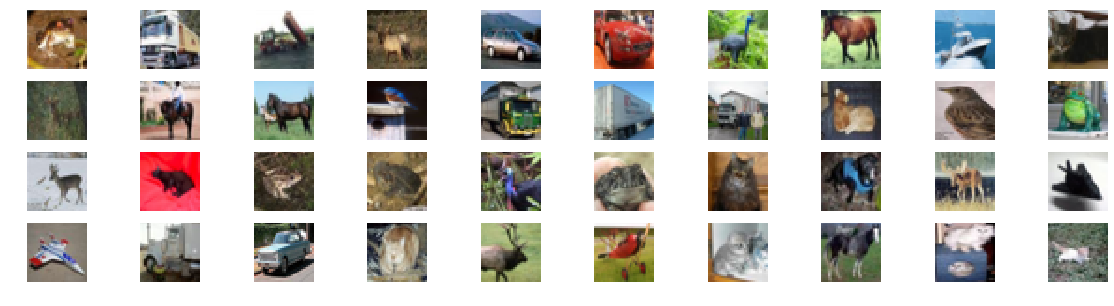

labels:  [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6]


In [5]:
from keras.datasets import cifar10

cifar = cifar10.load_data()

(x_train, y_train_), (x_test, y_test_) = cifar

print('train data:\t', x_train.shape, y_train.shape)
print('test data:\t', x_test.shape, y_test.shape)

plt.figure(figsize=(20,5))
for i in range(40):
    plt.subplot(4, 10, i+1)
    example = x_train[i]
    plt.imshow(example)
    plt.axis('off')
plt.show()
print('labels: ', y_train[:40])

### Exercise 3.1 - 3.3: Redo exercises 2.1 - 2.3 with Cifar Dataset

# 2. Convolutional Neural Networks

## 2.1 MNIST Dataset

**Exercise 4.1: Reshape data to size (28 x 28 x 1)** 

**Exercise 4.2: Write a convolutional neural network model to train MNIST. Objective 99\% accuracy for test set** 

## 2.1 Cifar Dataset

**Exercise 5.1: Write a convolutional neural network model to train MNIST. Objective 99\% accuracy for test set** 

**Exercise 5.2: Batch normalization is known to improve result. Add batch normalization after some layers to see results** 

# 3. Keras with data from directories

Before our data are provided as numpy arrays and already normalized (same size). Now we move to a dataset with high resolution images (around 300 * 300) organized in folders.
- download bird dataset at: http://perso.ens-lyon.fr/tien-nam.le/data/ML/birds.zip

## 3.1 Data flow

This is an excerpt of CUB-200 dataset (http://www.vision.caltech.edu/visipedia/CUB-200.html), which contain 200 types of birds. Our sub-dataset contains 10 types of birds, each type contains around 50 images for training and 10 images for testing.

<img src = "http://www.vision.caltech.edu/visipedia/collage.jpg">

We face 3 problems here:
1. How to label the data?
2. How to feed images and their labels to the neural net?
3. How to normalize the size of the images (to feed to the input of the neural net)?

All these problems can be solved by ImageDataGenerator. Keras will run through whole directory 'birds/train' and get images and label each image from 0 to 9 by the subfolders containing it. Thus, the subfolders of train folder and test folder must be similar

In [6]:
from keras.preprocessing.image import ImageDataGenerator

#Note that here we set image size 128*128

train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(
        'birds/train',
        target_size=(128, 128),
        batch_size=32,
        shuffle = True
        )

Found 479 images belonging to 10 classes.


Here are the labels of all images in the train folder.

In [7]:
train_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,

The same for test folder

In [8]:
test_datagen = ImageDataGenerator()
test_generator = train_datagen.flow_from_directory(
        'birds/test',
        target_size=(128, 128),
        batch_size=32)

Found 100 images belonging to 10 classes.


**Exercise 6.1: Write a convolutional model taking input the same size as the input size we chose above**

We train our model the same way as before, except we use 
- fit_generator instead of it
- train_generator instead of X_train and y_train

**Exercise 6.2: Train the model, use validation_data with test set to see test accuracy after each step**

High chance there is overfit in the training process .
- 100% train acc
- very low test acc

**Exercise 6.3: Try to use previous techniques to fix overfitting problem**

Indeed, the main reason of overfit is that there very few training data (500). There are two ways to overcome it:
- Data augmentation
- Fine tuning with pretrained models

## 3.2. Data augmentation

Data augmentation is a technique to increase your training data by random cropping, rotating, flipping... your images. This will only done with training images, not testing images. Keras support Data augmentation with only some lines of code: https://keras.io/preprocessing/image/

**Exercise 7.1 Implement Data augmentation for your model. Note that don't apply data augmentation on test dataset, and don't forget to recompile your model to reset weights**

## 3.3 Fine tuning from Pretrained models

Keras provides some well-known models: InceptionV3, Resnet, NASNet, together with weights pretrained by imagenet.  https://keras.io/applications/

We will choose DenseNet121, one of the lightest one.

In [9]:
from keras.applications.densenet import DenseNet121

base_model = DenseNet121(weights = 'imagenet', include_top = False)

base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, None, None, 6 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

We could not train them from scratch. We will freeze all its weights of the model, and build on top of it two fully connected layers to train. As you can see, we only train 100K weights in 7M weights.

Total params: 7,141,014

Trainable params: 103,510

Non-trainable params: 7,037,504

In [11]:
from keras.layers import GlobalAveragePooling2D, Dropout
from keras.models import Model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(100, activation = 'relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x) 

model = Model(inputs=base_model.input, outputs=predictions)

# freeze weights of base model
for layer in base_model.layers:
    layer.trainable = False

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, None, None, 6 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

**Exercise 8.1 Train with that model**

**Exercise 8.2 Use all possible techniques to get 80\% accuracy**